In [5]:
# Shiyi (Amy) Qin and Victor Z
# UW-Madison, 2024
# illustrate convolution filters

## Start here if working on google collab

---



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Specify the path of this file (This may differ for each user)
path = '/content/drive/MyDrive/StatsBookCode/Python/'

In [8]:
# This is to check if the speficied path above is correct
!echo $path
import os
os.path.isdir(path)

/content/drive/MyDrive/StatsBookCode/Python/


True

In [9]:
# This is needed so we can import packages from a different path than standard libraries
import sys
sys.path.append(path)

## Start from here if working on local computer

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
from scipy.signal.windows import gaussian

In [11]:
# Parameters
L = 1000  # length of signal
Fs = 1000  # Hz (sampling frequency)
T = 1 / Fs  # sec (sampling period)
t = np.arange(L) * T  # time vector
om = Fs * np.arange(L // 2 + 1) / L  # frequency vector

In [12]:
# Generate signals
f1 = np.sin(2 * np.pi * 30 * t)  # low-frequency signal
f2 = np.sin(2 * np.pi * 100 * t)  # high-frequency signal
f = f1 + f2

In [13]:
# Compute Fourier Transform
fh = np.fft.fft(f)
m = np.abs(fh)  # magnitude
mf = m[:L // 2 + 1]  # eliminate symmetry
mf[1:-1] = 2 * mf[1:-1]


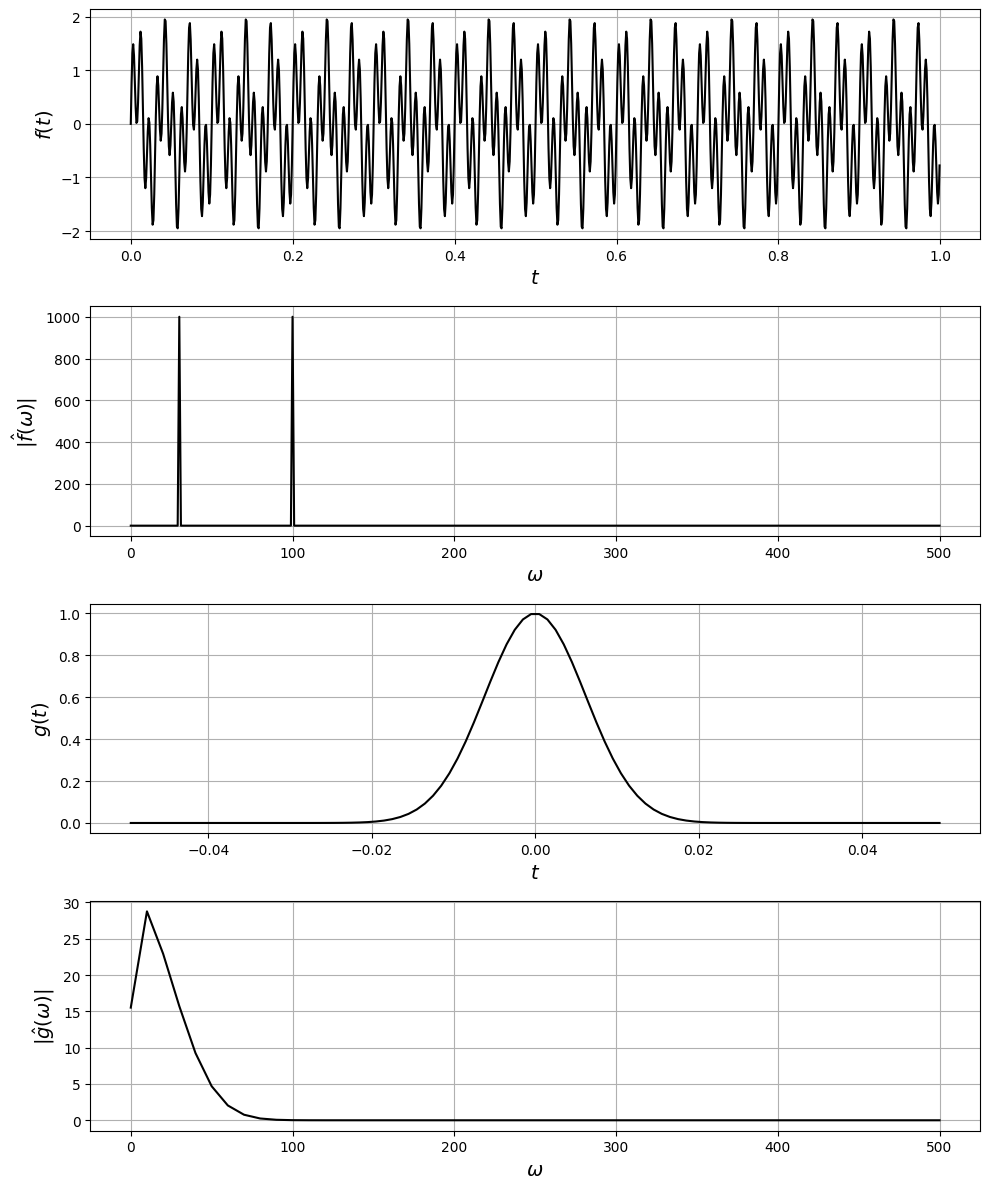

In [14]:
# Plot time and frequency domain of the signal
plt.figure(figsize=(10, 12))
plt.subplot(4, 1, 1)
plt.plot(t, f, 'k', linewidth=1.5)
plt.grid(True)
plt.ylabel('$f(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)

plt.subplot(4, 1, 2)
plt.plot(om, mf, 'k', linewidth=1.5)
plt.grid(True)
plt.ylabel('$|\\hat{f}(\\omega)|$', fontsize=14)
plt.xlabel('$\\omega$', fontsize=14)

# Gaussian filter
N = 100
n = np.arange(-(N-1)/2, (N-1)/2 + 1)
alpha = 8  # increase to increase cut-off frequency
w = gaussian(N, std=(N-1)/(2*alpha))
stdev = (N-1) / (2 * alpha)

# Compute Fourier Transform of the Gaussian filter
wh = np.fft.fft(w)
m = np.abs(wh)  # magnitude
mw = m[:N // 2 + 1]  # eliminate symmetry
mw[1:-1] = 2 * mw[1:-1]
om_w = np.arange(N // 2 + 1) / N * Fs  # frequency vector for the filter

# Plot time and frequency domain of the Gaussian filter
plt.subplot(4, 1, 3)
plt.plot(n * T, w, 'k', linewidth=1.5)
plt.grid(True)
plt.ylabel('$g(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)

plt.subplot(4, 1, 4)
plt.plot(om_w, mw, 'k', linewidth=1.5)
plt.grid(True)
plt.ylabel('$|\\hat{g}(\\omega)|$', fontsize=14)
plt.xlabel('$\\omega$', fontsize=14)

plt.tight_layout()
plt.show()


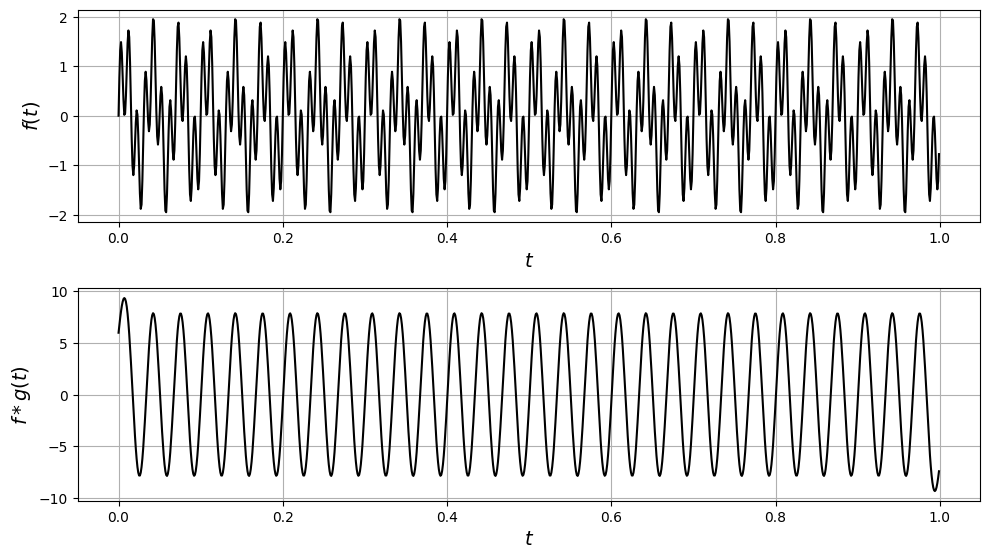

In [15]:
# Apply the Gaussian filter
phi = fftconvolve(f, w, mode='same')

# Plot original and filtered signal
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(t, f, 'k', linewidth=1.5)
plt.grid(True)
plt.ylabel('$f(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)

plt.subplot(3, 1, 2)
plt.plot(t, phi, 'k', linewidth=1.5)
plt.grid(True)
plt.ylabel('$f*g(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)

plt.tight_layout()
plt.show()